# Project Building A Handwritten Digits Classifier


## Introduction

### Preliminary

This Notebook is the conclusion of the **Deep Learning Fundamentals ** course from [dataquest.io](dataquest.io). It is a guided project whose aim is to use all the techniques and skills learnt during the course.
We'll build models that can classify handwritten digits, with data coming from the *Scikit-learn* library, that contains pre-loaded datasets. More specifically: within the namespace of `sklearn.datasets` the `load_digits()` function returns a copy of the hand-written digits [dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from UCI.

#### Blockquotes usage
> I am sometimes using blockquotes as this one, meaning that for the rest of the project I am quoting some elements given by dataquest. For the sake of simplicity and clarity, I estimated that they did not need any reformulation and were immediately usable and convenient for me and the reader.

### Context

> **Why is image classifcation a hard task?**

>Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

>First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

>Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

>Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256. 


> **Why is deep learning effective in image classification?**

> Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process. Here's a diagram that visualizes what the weights represent at each layer of a convolutional neural network, a type of network that's often used in image classification and unfortunately out of scope for this course, which was trained to identify faces.



#### Objectives
During this project we'll:

- explore why image classification is a hard task
- observe the limitations of traditional machine learning models for image classification
- train, test, and improve a few different deep neural networks for image classification


## Working with Image Data

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.


In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = load_digits()
print(data.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [3]:
labels = pd.Series(data['target'])
data = pd.DataFrame(data['data'])

In [4]:
data.shape

(1797, 64)

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (8 x 8 pixels). To visualize the image, we need to reshape these pixel values back into the 8 by 8 and plot them on a coordinate grid.

In [5]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

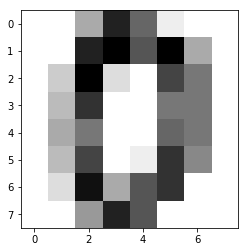

In [6]:
plt.imshow(np_image, cmap='gray_r')

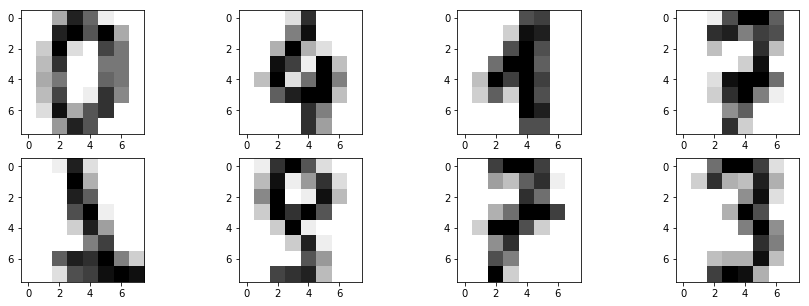

In [7]:
fig, ax = plt.subplots(2, 4, figsize=(15,5))
ax[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0, 1].imshow(data.iloc[100].values.reshape(8,8), cmap='gray_r')
ax[0, 2].imshow(data.iloc[200].values.reshape(8,8), cmap='gray_r')
ax[0, 3].imshow(data.iloc[300].values.reshape(8,8), cmap='gray_r')
ax[1, 0].imshow(data.iloc[1000].values.reshape(8,8), cmap='gray_r')
ax[1, 1].imshow(data.iloc[1100].values.reshape(8,8), cmap='gray_r')
ax[1, 2].imshow(data.iloc[1200].values.reshape(8,8), cmap='gray_r')
ax[1, 3].imshow(data.iloc[1300].values.reshape(8,8), cmap='gray_r')


##  K-Nearest Neighbors Model

>While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. If you recall, k-nearest neighbors don't have a specific model representation (hence why it's referred to as an algorithm and not a model).

>The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

### Setting up a pipeline for the model

#### Without Cross-Validation

Before training and testing our K-Nearest Neighbors Model we need to split our data into train and test sets. For the train test we will use 70% of the original dataset, by selecting a random sample. The 30% remaining will be the test set.

In [8]:
data = load_digits()

labels = pd.Series(data['target'])
data = pd.DataFrame(data['data'])

In [9]:
train_features = data.sample(frac=0.7)
test_features = data.loc[~data.index.isin(train_features.index)]

In [10]:
# spliting the labels with the corresponding generated indexes
train_labels=labels.iloc[train_features.index]
test_labels =labels.iloc[test_features.index]

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [12]:
def train(nneighbors,train_features,train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(knn,test_features,test_labels):
    test_predictions = knn.predict(test_features)
    accuracy = (test_predictions == test_labels).sum() / test_labels.shape[0]
    return accuracy    



In [13]:
knn = train(5,train_features,train_labels)
accuracy = test(knn,test_features,test_labels)
print(accuracy)

0.985157699443


Witout using cross-validation, and using k = 5 Neighbors, we manage to get an accuracy = 0.987.

#### With Cross-Validation

In [14]:
def train(nneighbors,train_features,train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(knn,test_features,test_labels):
    test_predictions = knn.predict(test_features)
    accuracy = (test_predictions == test_labels).sum() / test_labels.shape[0]
    return accuracy

def cross_validate(k):
    kf = KFold(n_splits=4)
    accuracy_list = []
    for train_index,test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        knn = train(k,train_features,train_labels)
        accuracy = test(knn,test_features,test_labels)
        accuracy_list.append(accuracy)
    return np.mean(accuracy_list)
        


In [15]:
L_k = [i for i in range(1,101)]
L_accuracies = [cross_validate(i) for i in range(1,101)]

Text(0.5,0,'k-neighbors')

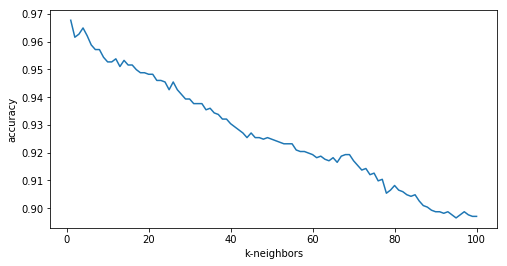

In [16]:
plt.figure(figsize=(8,4))
plt.plot(L_k,L_accuracies)
plt.ylabel("accuracy")
plt.xlabel("k-neighbors")

As it can be seen above, the K-nearest Neighbors algorithm leads to a solid accuracy when k is low. Then as k increases, the performance of the algorithm decreases.

## Neural Network With One Hidden Layer

Now we are going to compare the performances of the previous model with a KNN model with a Neural Network with one hidden layer.

In [17]:
from sklearn.neural_network import MLPClassifier

#### Without Cross-Validation

In [18]:
data = load_digits()

labels = pd.Series(data['target'])
data = pd.DataFrame(data['data'])

train_features = data.sample(frac=0.7)
test_features = data.loc[~data.index.isin(train_features.index)]

# spliting the labels with the corresponding generated indexes
train_labels=labels.iloc[train_features.index]
test_labels =labels.iloc[test_features.index]

In [19]:
def train_nn(n_neurons,train_features,train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=(n_neurons,))
    mlp.fit(train_features, train_labels)
    return mlp

def test_nn(mlp,test_features,test_labels):
    test_predictions = mlp.predict(test_features)
    accuracy = (test_predictions == test_labels).sum() / test_labels.shape[0]
    return accuracy    


In [20]:
mlp = train_nn(8,train_features,train_labels)

/Users/louisboivin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
accuracy = test_nn(mlp,test_features,test_labels)
print(accuracy)

0.877551020408


#### With Cross-Validation

In [22]:
data = load_digits()

labels = pd.Series(data['target'])
data = pd.DataFrame(data['data'])

In [23]:
def train_nn(layers,train_features,train_labels):
    mlp = MLPClassifier(hidden_layer_sizes= layers)
    mlp.fit(train_features, train_labels)
    return mlp

def test_nn(mlp,test_features,test_labels):
    test_predictions = mlp.predict(test_features)
    accuracy = (test_predictions == test_labels).sum() / test_labels.shape[0]
    return accuracy 

def cross_validate_nn(layers):
    kf = KFold(n_splits=4,random_state=2, shuffle=True)
    accuracy_list = []
    for train_index,test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        mlp = train_nn(layers,train_features,train_labels)
        accuracy = test_nn(mlp,test_features,test_labels)
        accuracy_list.append(accuracy)
    return np.mean(accuracy_list)


In [24]:
L_neurons = [(2**i,) for i in range(3,9)]

In [25]:
L_acc_1 = [cross_validate_nn(n) for n in L_neurons]
print(L_acc_1)

/Users/louisboivin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.89871937639198218, 0.93990967582281615, 0.96383568423657517, 0.96884434545904485, 0.96995298193516444, 0.97719128928483046]


Text(0.5,0,'n neurons in the Hidden Layer')

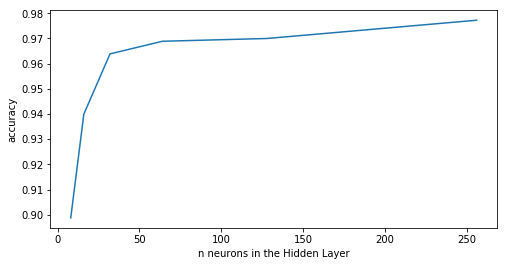

In [26]:
plt.figure(figsize=(8,4))
plt.plot(L_neurons,L_acc_1)
plt.ylabel("accuracy")
plt.xlabel("n neurons in the Hidden Layer")

**Observations**

When using only one hidden layer, increasing the number of neurons in the latter improves the accuracy of the model. Nevertheless, we are hardly reaching an 0.98 accuracy with 256 neurons in the layer, so it's not better than the K-nearest neighbor algorith where k = 5. (See above)


## Neural Network With two hidden layers

Now we are going to add a second layer to our Network and see if it improves the performances.

In [27]:
cross_validate_nn((64,64))

0.97274065825290768

In [28]:
L_neurons_2 = [(64,64),(128,128),(256,256)]
L_acc_2 = [cross_validate_nn(n) for n in L_neurons_2]
print(L_acc_2)


[0.9693986636971047, 0.97718510269735215, 0.98052585993565955]


Text(0,0.5,'accuracy')

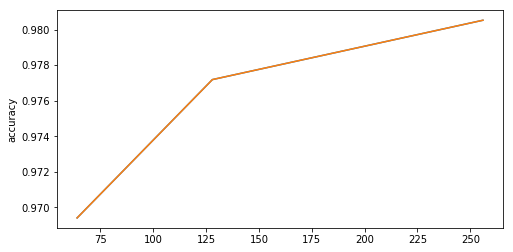

In [29]:
plt.figure(figsize=(8,4))
plt.plot(L_neurons_2,L_acc_2)
plt.ylabel("accuracy")


**Observations**

When using 2 hidden layers, increasing the number of neurons in the latter improves the accuracy of the model. Nevertheless, we are hardly reaching an 0.98 accuracy with 256 neurons in the layer, so it's not better than the K-nearest neighbor algorith where k = 5 neither the 1-layer model (See above)


## Neural Network With three hidden layers

In [ ]:
def train_nn(layers,train_features,train_labels):
    mlp = MLPClassifier(hidden_layer_sizes= layers)
    mlp.fit(train_features, train_labels)
    return mlp

def test_nn(mlp,test_features,test_labels):
    test_predictions = mlp.predict(test_features)
    accuracy = (test_predictions == test_labels).sum() / test_labels.shape[0]
    return accuracy 

def cross_validate_nn(layers):
    kf = KFold(n_splits=6,random_state=2, shuffle=True)
    accuracy_list = []
    for train_index,test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        mlp = train_nn(layers,train_features,train_labels)
        accuracy = test_nn(mlp,test_features,test_labels)
        accuracy_list.append(accuracy)
    return np.mean(accuracy_list)


In [ ]:
L_neurons_3 = [(10,10,10),(64,64,64),(128,128,128)]
L_acc_3 = [cross_validate_nn(n) for n in L_neurons_3]
print(L_acc_2)


plt.figure(figsize=(8,4))
plt.plot(L_neurons_3,L_acc_3)
plt.ylabel("accuracy")

/Users/louisboivin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**Observations**

When using 3 hidden layers, increasing the number of neurons in the latter improves the accuracy of the model. Nevertheless, we are hardly reaching an 0.98 accuracy with 128 neurons in each of the 3 layers, so it's not better than the K-nearest neighbor algorith where k = 5 netiher the 1-layer model, nor the 2-layer model  (See above)
